In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

## Import the data

In [3]:
(X_train, _), (X_test, _) = mnist.load_data()

In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
X_train.shape

(60000, 28, 28)

We have **60000** data points with 28 rows and columns

In [6]:
X_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
X_train[0][5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
       0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        ])

The values are now in the _range from 0 to 1_

In [9]:
X_train = X_train.reshape(len(X_train), 28*28)
X_test = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train.shape

(60000, 784)

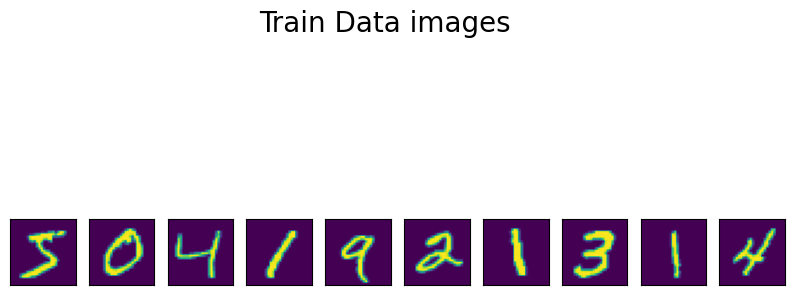

In [12]:
plt.figure(figsize=(10,5))
for i in range(10):
  ax = plt.subplot(1,10,i+1)
  plt.imshow(X_train[i].reshape(28,28))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.suptitle('Train Data images', fontsize=20)
plt.show()



Turn the above into a function to be used for any data

In [13]:
def show_visual(data, title, n=10, height=28, width=28):
  '''
  Show the image data on a given dataset
  '''
  plt.figure(figsize=(10,5))
  for i in range(n):
    ax = plt.subplot(1,n,i+1)
    plt.imshow(data[i].reshape(height,width))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.suptitle(title, fontsize=20)
  plt.show()

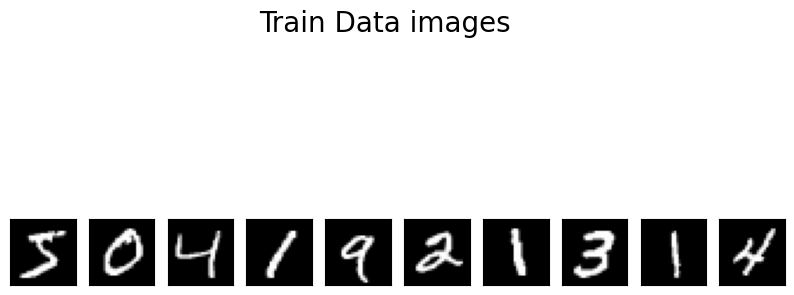

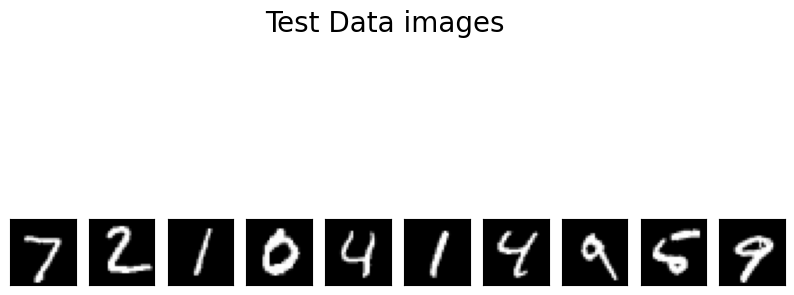

In [14]:
show_visual(X_train, 'Train Data images')
show_visual(X_test, 'Test Data images')


In [15]:
input_dim, output_dim = 784, 784
encode_dim = 100
hidden_dim = 256

In [17]:
# Encoder
input_layer = Input(shape=(input_dim,), name="INPUT") # Change here: Wrap input_dim in a tuple
hidden_layer_1 = Dense(hidden_dim, activation="relu", name="HIDDEN_1")(input_layer)

In [18]:
# Bottle neck
bottle_neck = Dense(encode_dim, activation="relu", name="BOTTLENECK")(hidden_layer_1)

In [19]:
# Decoder
hidden_layer_2 = Dense(hidden_dim, activation="relu", name="HIDDEN_2")(bottle_neck)
output_layer = Dense(output_dim, activation="sigmoid", name="OUTPUT")(hidden_layer_2)

In [20]:
model = Model(inputs=input_layer, outputs=output_layer)

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ INPUT (InputLayer)                   │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HIDDEN_1 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BOTTLENECK (Dense)                   │ (None, 100)                 │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HIDDEN_2 (Dense)                     │ (None, 256)                 │          25,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OUTPUT (Dense)                       │ (None, 784)                 │         201,488 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 454,004 (1.73 MB)

 Trainable params: 454,004 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(X_train, X_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 0.1601
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 0.0826
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0769
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0741
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0727
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0718
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0710
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0704
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0700
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0696


As epoch increases, the lesser the loss, but on 8th epoch the decrease in the loss is very small showing that any epoch above 8 wont make much of a difference; we ought to stop at 8th epoch

In [24]:
decoded_data = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [25]:
get_encoded_data = Model(inputs=model.input,
                         outputs=model.get_layer('BOTTLENECK').output)

In [26]:
encoded_data = get_encoded_data.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


## Visualize the results

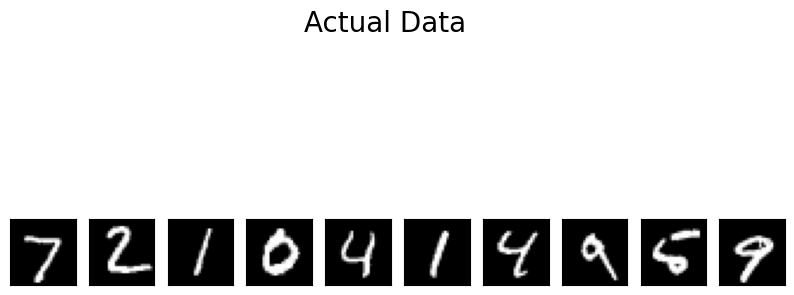

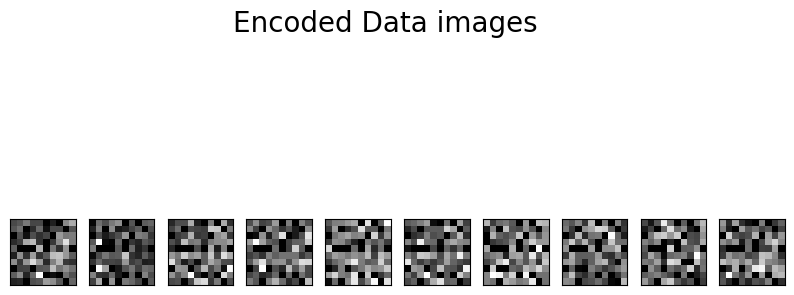

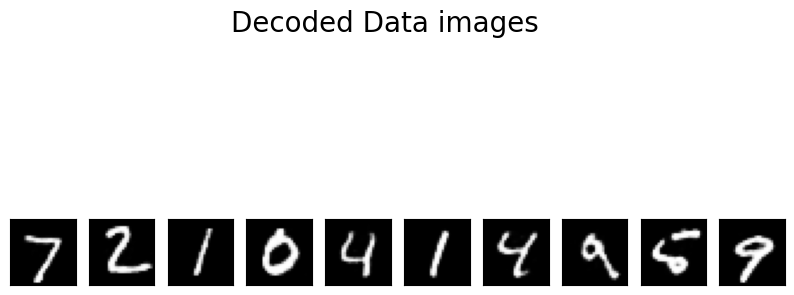

In [27]:
show_visual(X_test, 'Actual Data')
show_visual(encoded_data, 'Encoded Data images', height=10, width=10)  # its resolution wont be same as our testing data
show_visual(decoded_data, 'Decoded Data images')


The **decoded** data and **actual data** might not look different, but they are actually different

eg: the stem of the 9 in actual data is smoother than the one in decoded data images

**NOTE** this would be different with different runs